# K-means Project

In this small project you will use the k-means algorithm to segment houses based on their coordinates and median income.

## Importing Libraries

In [1]:
### Load libraries and modules ###
# Dataframes and matrices ----------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Loading the dataset

In [2]:
# Loading the dataset
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
# Create a copy of the original dataset
df = df_raw.copy()

## Data Exploration



In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df_raw.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Preprocess of the data

Create a new dataframe with only the 'latitude', 'longitude' and 'medincome' column to create our clusters.

In [5]:
# New dataframe with only the 'latitude', 'longitude' and 'medincome' column
df = df.loc[:,['Latitude', 'Longitude', 'MedInc']]

In [6]:
df.head(5)

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


## K-means algorithm

### Determine K value by Elbow method

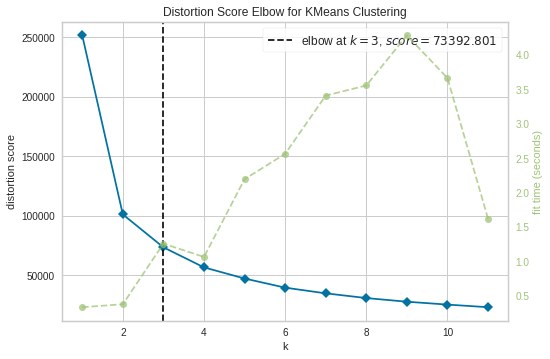

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

### Creation of the new 'cluster' feature

In [8]:
# Instantiate the kmeans algorithm
kmeans = KMeans(n_clusters=3)

In [9]:
# Create cluster feature and predict the cluster by fitting the 3 columns you have
df["Cluster"] = kmeans.fit_predict(df)
# 'cluster' column to 'category' type
df["Cluster"] = df["Cluster"].astype("category")

In [10]:
df.head()

,Latitude,Longitude,MedInc,Cluster
0,37.88,-122.23,8.3252,0
1,37.86,-122.22,8.3014,0
2,37.85,-122.24,7.2574,0
3,37.85,-122.25,5.6431,0
4,37.85,-122.25,3.8462,0


In [11]:
kmeans.cluster_centers_

array([[  37.98216152, -121.73201963,    3.68154412],
       [  33.973424  , -117.99760427,    3.12577545],
       [  34.09032407, -118.30607906,    6.92723864]])

### Clusters visualization

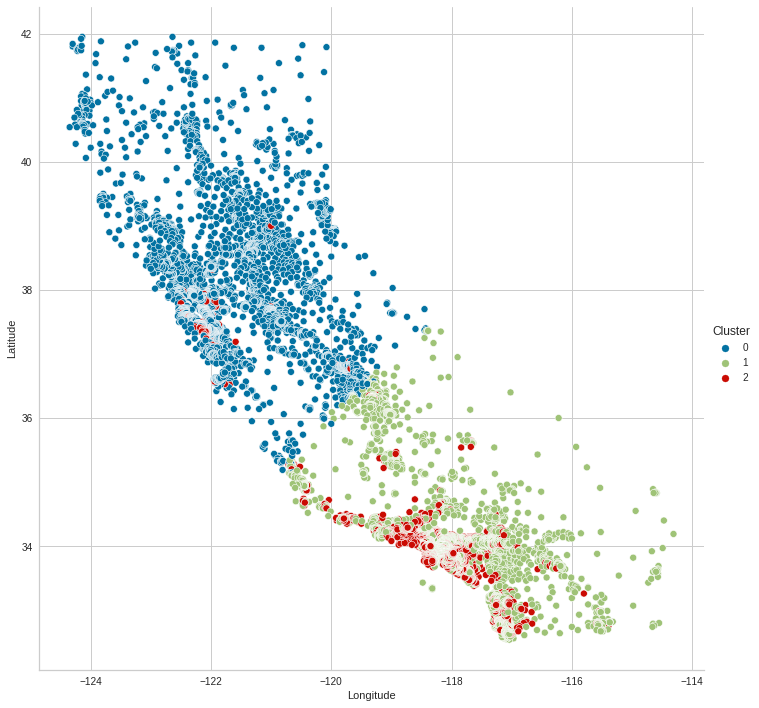

In [12]:
sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", data=df, height=10,
);